# 📘 Module 2: 打开黑盒子 - 物理模型拆解 (Inside the Black Box)

## 学习目标 (Learning Objectives)

- 理解过程驱动模型（以HBV为例）的物理意义
- 学习HBV模型的四个核心模块
- 通过交互式工具直观感受参数对模拟结果的影响
- 理解为什么物理模型需要这么多参数

---

## 🔬 什么是"黑盒子"？

在上一个模块中，我们用一个简单的线性水箱模型来模拟降雨-径流过程。
但真实的水文过程远比这复杂！

今天，我们要"打开"HBV模型这个"黑盒子"，看看里面到底有什么。

### HBV模型简介

HBV (Hydrologiska Byråns Vattenbalansavdelning) 模型由瑞典水文研究所开发，
是全球应用最广泛的概念性水文模型之一。

它包含**四个主要模块**：
1. 🌨️ **雪模块** - 模拟降雪累积和融化
2. 🌱 **土壤模块** - 模拟土壤水分平衡和产流
3. 💧 **响应模块** - 模拟地下水储存和出流
4. 🌊 **汇流模块** - 模拟河道汇流过程

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import sys
import os

# 添加项目路径
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# 设置绘图参数
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 设置随机种子
np.random.seed(42)

print("✅ 环境设置完成！")

✅ 环境设置完成！


## 🏗️ Part 1: HBV模型结构图

让我们先用图形化的方式理解HBV模型的结构。

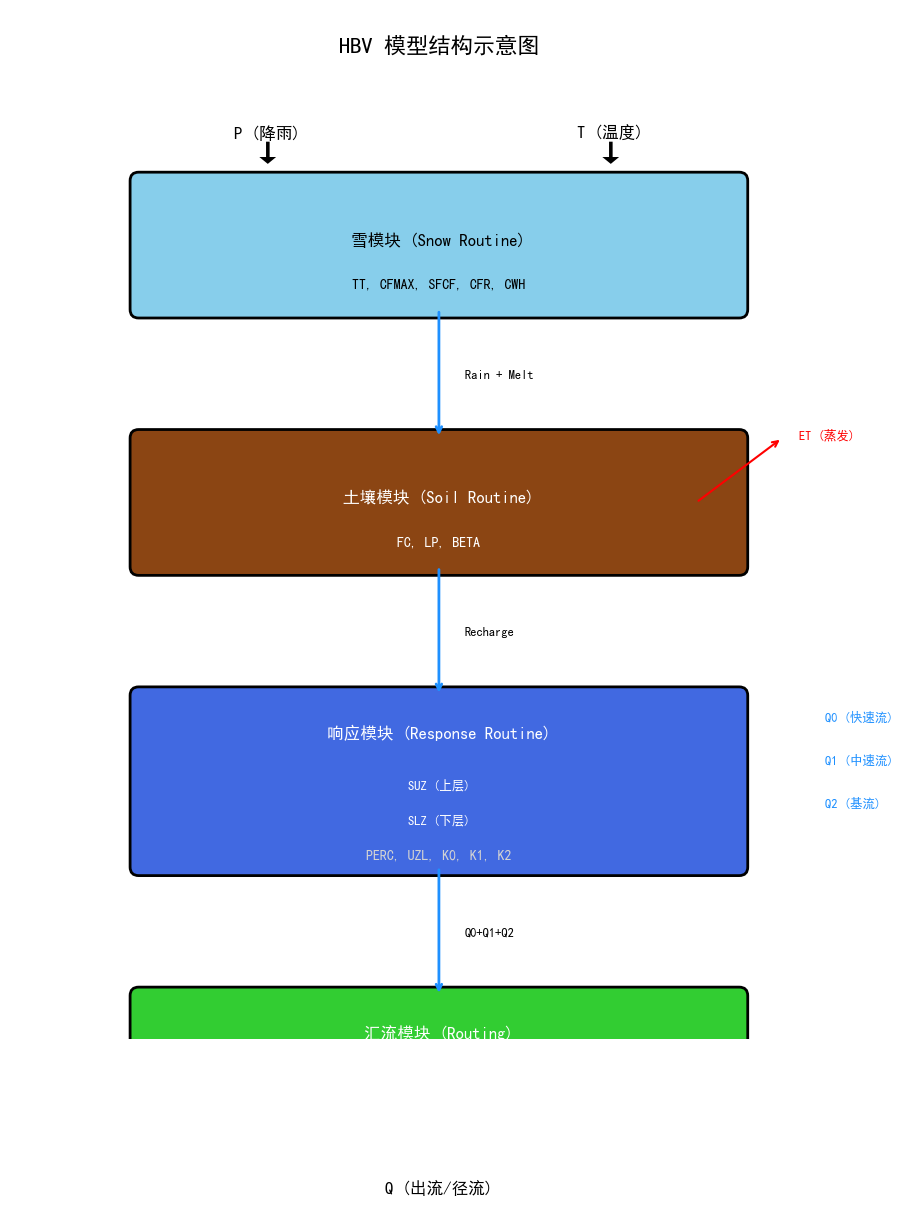

In [2]:
def draw_hbv_structure():
    """
    绘制HBV模型的结构示意图
    """
    fig, ax = plt.subplots(figsize=(14, 12))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # 颜色定义
    colors = {
        'snow': '#87CEEB',      # 天蓝色
        'soil': '#8B4513',      # 棕色
        'response': '#4169E1',   # 皇家蓝
        'routing': '#32CD32',    # 绿色
        'water': '#1E90FF'       # 道奇蓝
    }
    
    # 标题
    ax.text(5, 11.5, 'HBV 模型结构示意图', fontsize=16, ha='center', fontweight='bold')
    
    # 输入：降雨和温度
    ax.annotate('P (降雨)', xy=(3, 10.5), fontsize=12, ha='center')
    ax.annotate('T (温度)', xy=(7, 10.5), fontsize=12, ha='center')
    ax.annotate('↓', xy=(3, 10.2), fontsize=20, ha='center')
    ax.annotate('↓', xy=(7, 10.2), fontsize=20, ha='center')
    
    # 模块1: 雪模块
    snow_box = FancyBboxPatch((1.5, 8.5), 7, 1.5, boxstyle="round,pad=0.1", 
                               facecolor=colors['snow'], edgecolor='black', linewidth=2)
    ax.add_patch(snow_box)
    ax.text(5, 9.25, '雪模块 (Snow Routine)', fontsize=12, ha='center', fontweight='bold')
    ax.text(5, 8.75, 'TT, CFMAX, SFCF, CFR, CWH', fontsize=10, ha='center', style='italic')
    
    # 箭头
    ax.annotate('', xy=(5, 7), xytext=(5, 8.5),
                arrowprops=dict(arrowstyle='->', color=colors['water'], lw=2))
    ax.text(5.3, 7.7, 'Rain + Melt', fontsize=9)
    
    # 模块2: 土壤模块
    soil_box = FancyBboxPatch((1.5, 5.5), 7, 1.5, boxstyle="round,pad=0.1", 
                               facecolor=colors['soil'], edgecolor='black', linewidth=2)
    ax.add_patch(soil_box)
    ax.text(5, 6.25, '土壤模块 (Soil Routine)', fontsize=12, ha='center', 
            fontweight='bold', color='white')
    ax.text(5, 5.75, 'FC, LP, BETA', fontsize=10, ha='center', style='italic', color='white')
    
    # 蒸发箭头
    ax.annotate('', xy=(9, 7), xytext=(8, 6.25),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5))
    ax.text(9.2, 7, 'ET (蒸发)', fontsize=9, color='red')
    
    # 箭头
    ax.annotate('', xy=(5, 4), xytext=(5, 5.5),
                arrowprops=dict(arrowstyle='->', color=colors['water'], lw=2))
    ax.text(5.3, 4.7, 'Recharge', fontsize=9)
    
    # 模块3: 响应模块
    resp_box = FancyBboxPatch((1.5, 2), 7, 2, boxstyle="round,pad=0.1", 
                               facecolor=colors['response'], edgecolor='black', linewidth=2)
    ax.add_patch(resp_box)
    ax.text(5, 3.5, '响应模块 (Response Routine)', fontsize=12, ha='center', 
            fontweight='bold', color='white')
    ax.text(5, 2.9, 'SUZ (上层)', fontsize=9, ha='center', color='white')
    ax.text(5, 2.5, 'SLZ (下层)', fontsize=9, ha='center', color='white')
    ax.text(5, 2.1, 'PERC, UZL, K0, K1, K2', fontsize=10, ha='center', style='italic', color='lightgray')
    
    # 多个出流箭头
    ax.annotate('Q0 (快速流)', xy=(9.5, 3.7), fontsize=9, color=colors['water'])
    ax.annotate('Q1 (中速流)', xy=(9.5, 3.2), fontsize=9, color=colors['water'])
    ax.annotate('Q2 (基流)', xy=(9.5, 2.7), fontsize=9, color=colors['water'])
    
    # 箭头
    ax.annotate('', xy=(5, 0.5), xytext=(5, 2),
                arrowprops=dict(arrowstyle='->', color=colors['water'], lw=2))
    ax.text(5.3, 1.2, 'Q0+Q1+Q2', fontsize=9)
    
    # 模块4: 汇流模块
    rout_box = FancyBboxPatch((1.5, -0.5), 7, 1, boxstyle="round,pad=0.1", 
                               facecolor=colors['routing'], edgecolor='black', linewidth=2)
    ax.add_patch(rout_box)
    ax.text(5, 0, '汇流模块 (Routing)', fontsize=12, ha='center', 
            fontweight='bold', color='white')
    ax.text(5, -0.4, 'MAXBAS', fontsize=10, ha='center', style='italic', color='white')
    
    # 最终输出
    ax.annotate('', xy=(5, -1.5), xytext=(5, -0.5),
                arrowprops=dict(arrowstyle='->', color=colors['water'], lw=3))
    ax.text(5, -1.8, 'Q (出流/径流)', fontsize=12, ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

draw_hbv_structure()

## ❄️ Part 2: 雪模块详解

雪模块使用**度日法 (Degree-Day Method)** 来模拟雪的累积和融化。

### 核心公式

1. **降水类型判断**：
   - 当 T < TT (阈值温度) → 降雪 (snow = P × SFCF)
   - 当 T ≥ TT → 降雨 (rain = P)

2. **融雪计算**：
   $$M = CFMAX \times (T - TT)$$
   - M: 融雪量 [mm/day]
   - CFMAX: 度日因子 [mm/°C/day]
   - T: 温度 [°C]
   - TT: 阈值温度 [°C]

### 关键参数
| 参数 | 含义 | 典型范围 |
|------|------|----------|
| TT | 阈值温度 | -2.5 ~ 2.5 °C |
| CFMAX | 度日因子 | 1 ~ 10 mm/°C/day |
| SFCF | 降雪修正系数 | 0.4 ~ 1.6 |
| CFR | 再冻结系数 | 0 ~ 0.1 |
| CWH | 持水能力 | 0 ~ 0.2 |

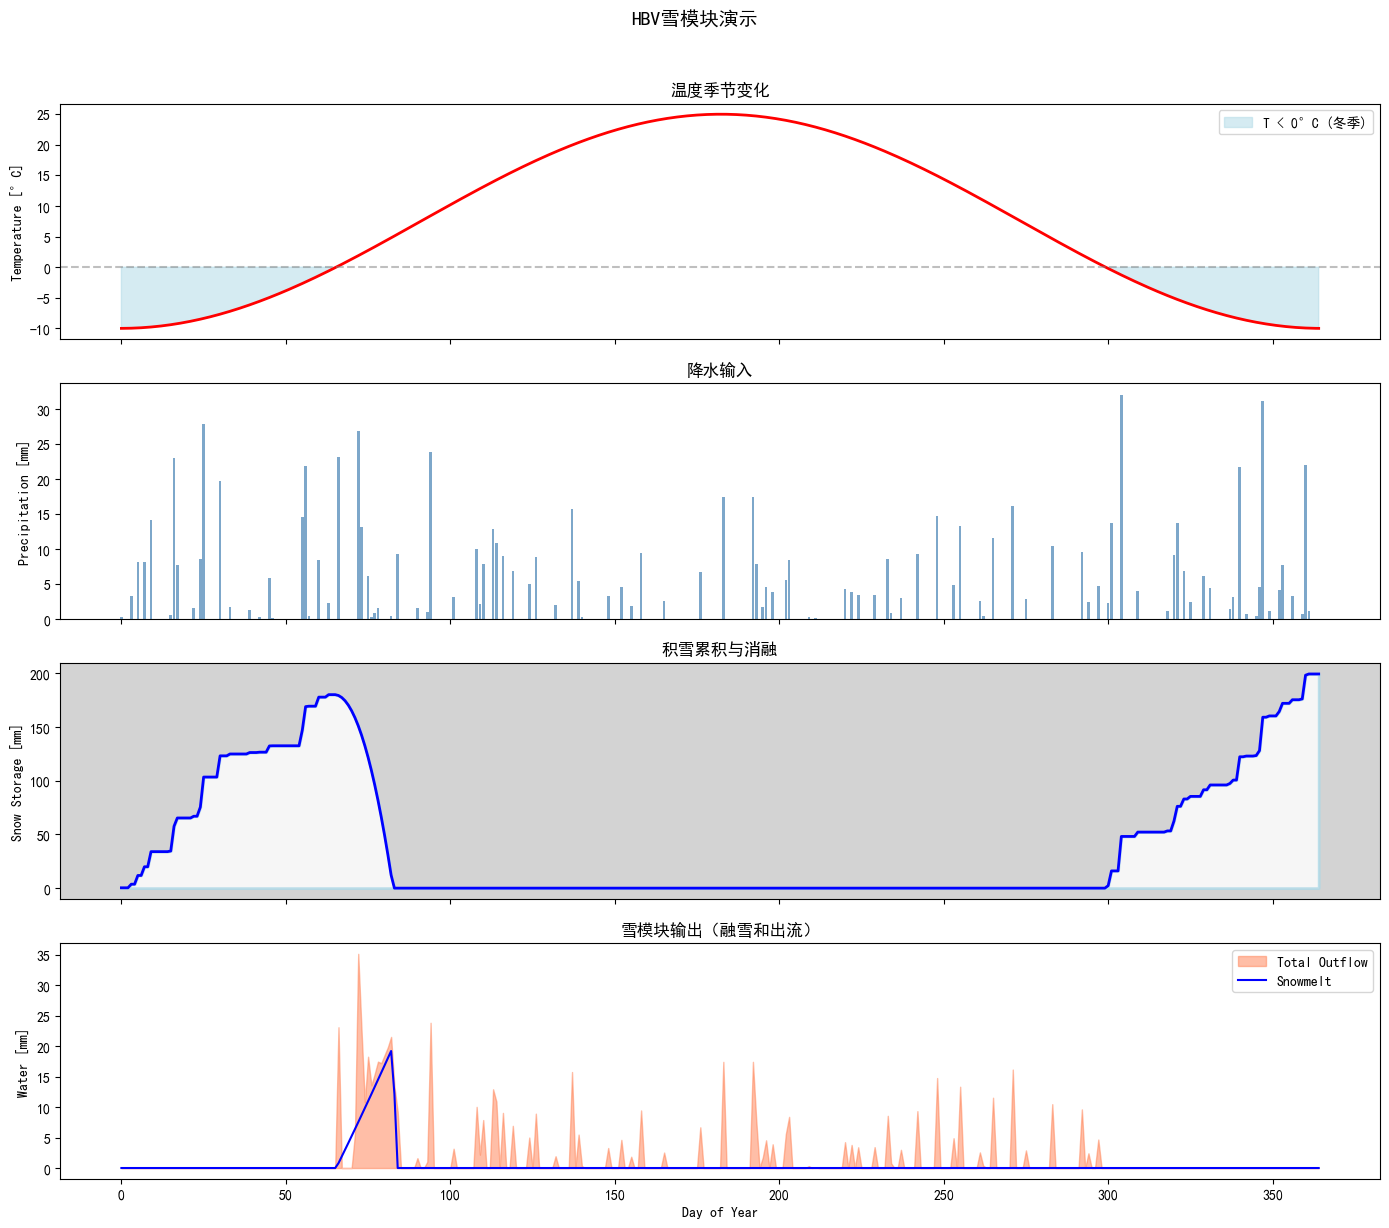

In [3]:
class SnowModule:
    """
    HBV模型的雪模块 - 简化版用于教学演示
    """
    def __init__(self, TT=0.0, CFMAX=3.5, SFCF=1.0, CFR=0.05, CWH=0.1):
        self.TT = TT        # 阈值温度
        self.CFMAX = CFMAX  # 度日因子
        self.SFCF = SFCF    # 降雪修正系数
        self.CFR = CFR      # 再冻结系数
        self.CWH = CWH      # 持水能力
        
        # 状态变量
        self.snow = 0.0        # 雪水当量 [mm]
        self.snow_water = 0.0  # 雪中液态水 [mm]
    
    def reset(self):
        """重置状态"""
        self.snow = 0.0
        self.snow_water = 0.0
    
    def run_timestep(self, precip, temp):
        """
        运行一个时间步
        
        Returns:
        --------
        outflow : float
            流出水量（降雨 + 释放的融雪水）
        snowmelt : float
            融雪量
        """
        # 1. 区分降雪和降雨
        if temp < self.TT:
            snowfall = precip * self.SFCF
            rainfall = 0.0
        else:
            snowfall = 0.0
            rainfall = precip
        
        self.snow += snowfall
        
        # 2. 计算融雪
        snowmelt = 0.0
        if temp > self.TT and self.snow > 0:
            potential_melt = self.CFMAX * (temp - self.TT)
            snowmelt = min(potential_melt, self.snow)
            self.snow -= snowmelt
        
        # 3. 再冻结
        if temp < self.TT and self.snow_water > 0:
            refreeze = min(self.CFR * self.CFMAX * (self.TT - temp), self.snow_water)
            self.snow += refreeze
            self.snow_water -= refreeze
        
        # 4. 液态水滞留
        self.snow_water += snowmelt
        max_water = self.CWH * self.snow
        
        water_release = 0.0
        if self.snow_water > max_water:
            water_release = self.snow_water - max_water
            self.snow_water = max_water
        
        outflow = rainfall + water_release
        
        return outflow, snowmelt

# 演示雪模块
def demo_snow_module():
    """演示雪模块的行为"""
    # 生成一年的气象数据
    days = 365
    day_of_year = np.arange(days)
    
    # 温度：正弦波模拟季节变化 (-10°C 到 25°C)
    temp = 7.5 + 17.5 * np.sin(2 * np.pi * (day_of_year - 91) / 365)
    
    # 降水：随机生成
    precip = np.zeros(days)
    rain_days = np.random.choice(days, size=int(days * 0.3), replace=False)
    precip[rain_days] = np.random.exponential(scale=8, size=len(rain_days))
    
    # 运行雪模块
    snow_module = SnowModule(TT=0.0, CFMAX=4.0)
    
    snow_storage = np.zeros(days)
    snowmelt_series = np.zeros(days)
    outflow_series = np.zeros(days)
    
    for t in range(days):
        outflow, snowmelt = snow_module.run_timestep(precip[t], temp[t])
        snow_storage[t] = snow_module.snow
        snowmelt_series[t] = snowmelt
        outflow_series[t] = outflow
    
    # 绘图
    fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
    
    # 温度
    axes[0].plot(day_of_year, temp, 'r-', linewidth=2)
    axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[0].fill_between(day_of_year, temp, 0, where=(temp < 0), 
                         color='lightblue', alpha=0.5, label='T < 0°C (冬季)')
    axes[0].set_ylabel('Temperature [°C]')
    axes[0].set_title('温度季节变化', fontweight='bold')
    axes[0].legend()
    
    # 降水
    axes[1].bar(day_of_year, precip, color='steelblue', alpha=0.7)
    axes[1].set_ylabel('Precipitation [mm]')
    axes[1].set_title('降水输入', fontweight='bold')
    
    # 雪储量
    axes[2].fill_between(day_of_year, 0, snow_storage, color='white', 
                         edgecolor='lightblue', linewidth=2, alpha=0.8)
    axes[2].plot(day_of_year, snow_storage, 'b-', linewidth=2)
    axes[2].set_ylabel('Snow Storage [mm]')
    axes[2].set_title('积雪累积与消融', fontweight='bold')
    axes[2].set_facecolor('lightgray')
    
    # 融雪和出流
    axes[3].fill_between(day_of_year, 0, outflow_series, color='coral', alpha=0.5, label='Total Outflow')
    axes[3].plot(day_of_year, snowmelt_series, 'b-', linewidth=1.5, label='Snowmelt')
    axes[3].set_ylabel('Water [mm]')
    axes[3].set_xlabel('Day of Year')
    axes[3].set_title('雪模块输出（融雪和出流）', fontweight='bold')
    axes[3].legend()
    
    plt.suptitle('HBV雪模块演示', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    return temp, precip, snow_storage

temp, precip, snow_storage = demo_snow_module()

### 💡 观察要点

从上图中，你能观察到：
1. 冬季（温度<0°C时）降雪累积
2. 春季（温度回升时）融雪高峰
3. 融雪和温度的关系是怎样的？

## 🌱 Part 3: 土壤模块详解

土壤模块控制着"产流"过程 - 决定有多少水变成径流，多少水被土壤吸收。

### 核心概念

1. **非线性产流**：
   $$Recharge = Input \times \left(\frac{SM}{FC}\right)^{BETA}$$
   
   - SM: 当前土壤湿度 [mm]
   - FC: 田间持水量（土壤"海绵"能吸多少水）[mm]
   - BETA: 形状系数（控制非线性程度）

2. **实际蒸散发**：
   $$ET_{actual} = ET_{potential} \times \min\left(1, \frac{SM}{LP \times FC}\right)$$
   - LP: 蒸发限制参数

### 关键参数
| 参数 | 含义 | 典型范围 |
|------|------|----------|
| FC | 田间持水量 | 50 ~ 500 mm |
| LP | 蒸发限制 | 0.3 ~ 1.0 |
| BETA | 形状系数 | 1 ~ 6 |

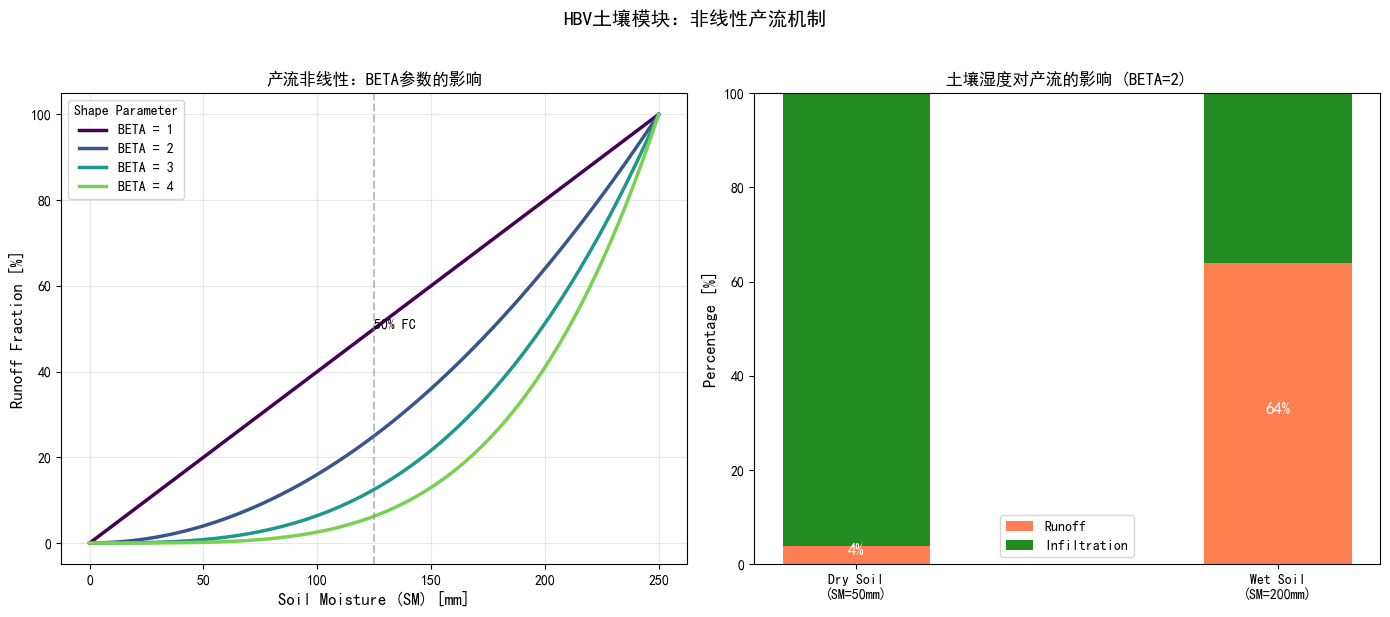

In [4]:
def visualize_soil_nonlinearity(FC=250, BETA_values=[1, 2, 3, 4]):
    """
    可视化土壤产流的非线性关系
    """
    SM_range = np.linspace(0, FC, 100)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # 左图：不同BETA值的产流曲线
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(BETA_values)))
    
    for BETA, color in zip(BETA_values, colors):
        runoff_fraction = (SM_range / FC) ** BETA
        axes[0].plot(SM_range, runoff_fraction * 100, color=color, 
                     linewidth=2.5, label=f'BETA = {BETA}')
    
    axes[0].set_xlabel('Soil Moisture (SM) [mm]', fontsize=12)
    axes[0].set_ylabel('Runoff Fraction [%]', fontsize=12)
    axes[0].set_title('产流非线性：BETA参数的影响', fontsize=12, fontweight='bold')
    axes[0].legend(title='Shape Parameter')
    axes[0].grid(True, alpha=0.3)
    axes[0].axvline(x=FC*0.5, color='gray', linestyle='--', alpha=0.5)
    axes[0].annotate(f'50% FC', xy=(FC*0.5, 50), fontsize=10)
    
    # 右图：物理解释
    # 湿态vs干态对比
    BETA = 2
    
    # 干态土壤 (SM = 50mm)
    SM_dry = 50
    runoff_dry = (SM_dry / FC) ** BETA * 100
    infiltration_dry = 100 - runoff_dry
    
    # 湿态土壤 (SM = 200mm)
    SM_wet = 200
    runoff_wet = (SM_wet / FC) ** BETA * 100
    infiltration_wet = 100 - runoff_wet
    
    x_pos = [0, 1]
    width = 0.35
    
    axes[1].bar(x_pos, [runoff_dry, runoff_wet], width, label='Runoff', color='coral')
    axes[1].bar(x_pos, [infiltration_dry, infiltration_wet], width, 
                bottom=[runoff_dry, runoff_wet], label='Infiltration', color='forestgreen')
    
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels([f'Dry Soil\n(SM={SM_dry}mm)', f'Wet Soil\n(SM={SM_wet}mm)'])
    axes[1].set_ylabel('Percentage [%]', fontsize=12)
    axes[1].set_title(f'土壤湿度对产流的影响 (BETA={BETA})', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].set_ylim(0, 100)
    
    # 添加注释
    axes[1].annotate(f'{runoff_dry:.0f}%', xy=(0, runoff_dry/2), ha='center', fontsize=12, color='white', fontweight='bold')
    axes[1].annotate(f'{runoff_wet:.0f}%', xy=(1, runoff_wet/2), ha='center', fontsize=12, color='white', fontweight='bold')
    
    plt.suptitle('HBV土壤模块：非线性产流机制', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

visualize_soil_nonlinearity()

### 🤔 思考问题

1. 调大FC（土壤像更大的海绵），洪峰会变高还是变低？为什么？
2. BETA=1时是什么情况？BETA越大代表什么物理过程？
3. 为什么湿态土壤产流更多？

## 💧 Part 4: 响应模块详解

响应模块模拟地下水储存和出流，使用**双层水箱结构**。

### 结构
- **SUZ (上层地下水)**：产生快速流和中速流
- **SLZ (下层地下水)**：产生基流

### 出流公式
- **Q0 (快速流)**: $Q_0 = K_0 \times \max(0, SUZ - UZL)$
- **Q1 (中速流)**: $Q_1 = K_1 \times SUZ$
- **Q2 (基流)**: $Q_2 = K_2 \times SLZ$

### 关键参数
| 参数 | 含义 | 典型范围 |
|------|------|----------|
| PERC | 渗漏率 | 0 ~ 6 mm/day |
| UZL | 快速流阈值 | 0 ~ 100 mm |
| K0 | 快速流系数 | 0.05 ~ 0.5 1/day |
| K1 | 中速流系数 | 0.01 ~ 0.4 1/day |
| K2 | 基流系数 | 0.001 ~ 0.15 1/day |

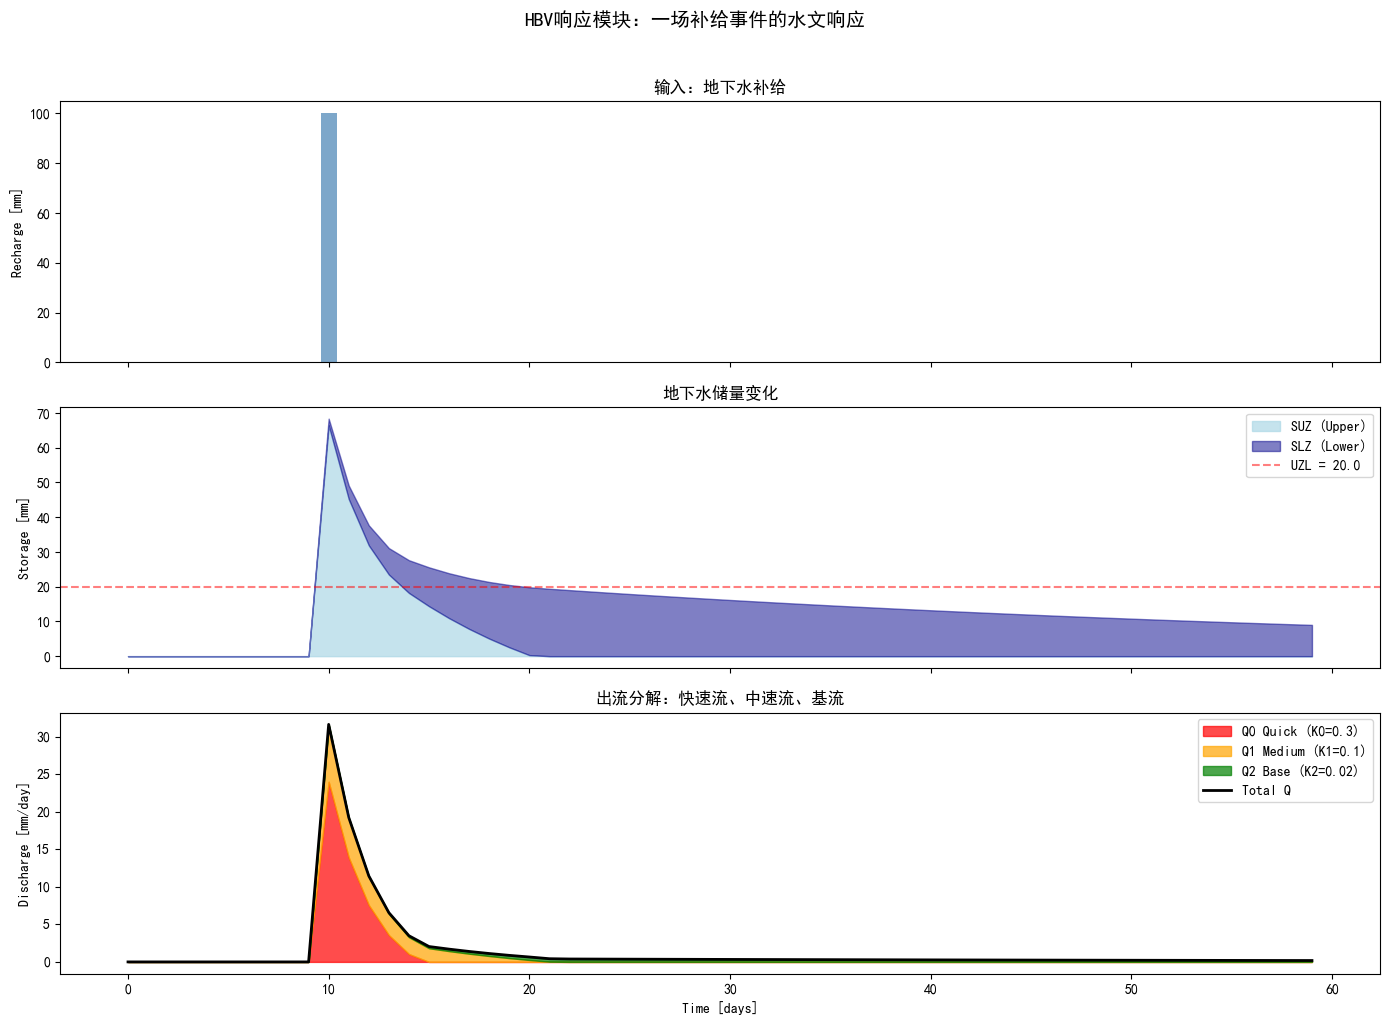

In [5]:
def visualize_response_routine():
    """
    可视化响应模块的双层结构
    """
    # 模拟一场暴雨事件后的响应
    days = 60
    
    # 模拟输入：第10天一场100mm的补给
    recharge = np.zeros(days)
    recharge[10] = 100
    
    # 参数
    PERC = 2.0
    UZL = 20.0
    K0 = 0.3
    K1 = 0.1
    K2 = 0.02
    
    # 状态变量
    SUZ = np.zeros(days)
    SLZ = np.zeros(days)
    Q0 = np.zeros(days)
    Q1 = np.zeros(days)
    Q2 = np.zeros(days)
    
    for t in range(1, days):
        # 输入
        SUZ[t] = SUZ[t-1] + recharge[t]
        
        # 快速流（超过阈值）
        if SUZ[t] > UZL:
            Q0[t] = K0 * (SUZ[t] - UZL)
            SUZ[t] -= Q0[t]
        
        # 中速流
        Q1[t] = K1 * SUZ[t]
        SUZ[t] -= Q1[t]
        
        # 渗漏
        perc = min(PERC, SUZ[t])
        SUZ[t] -= perc
        
        # 下层
        SLZ[t] = SLZ[t-1] + perc
        Q2[t] = K2 * SLZ[t]
        SLZ[t] -= Q2[t]
    
    # 绘图
    fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
    
    time = np.arange(days)
    
    # 上图：输入
    axes[0].bar(time, recharge, color='steelblue', alpha=0.7)
    axes[0].set_ylabel('Recharge [mm]')
    axes[0].set_title('输入：地下水补给', fontweight='bold')
    
    # 中图：储量变化
    axes[1].fill_between(time, 0, SUZ, color='lightblue', alpha=0.7, label='SUZ (Upper)')
    axes[1].fill_between(time, SUZ, SUZ+SLZ, color='darkblue', alpha=0.5, label='SLZ (Lower)')
    axes[1].axhline(y=UZL, color='red', linestyle='--', alpha=0.5, label=f'UZL = {UZL}')
    axes[1].set_ylabel('Storage [mm]')
    axes[1].set_title('地下水储量变化', fontweight='bold')
    axes[1].legend()
    
    # 下图：出流分解
    axes[2].fill_between(time, 0, Q0, color='red', alpha=0.7, label=f'Q0 Quick (K0={K0})')
    axes[2].fill_between(time, Q0, Q0+Q1, color='orange', alpha=0.7, label=f'Q1 Medium (K1={K1})')
    axes[2].fill_between(time, Q0+Q1, Q0+Q1+Q2, color='green', alpha=0.7, label=f'Q2 Base (K2={K2})')
    axes[2].plot(time, Q0+Q1+Q2, 'k-', linewidth=2, label='Total Q')
    axes[2].set_ylabel('Discharge [mm/day]')
    axes[2].set_xlabel('Time [days]')
    axes[2].set_title('出流分解：快速流、中速流、基流', fontweight='bold')
    axes[2].legend(loc='upper right')
    
    plt.suptitle('HBV响应模块：一场补给事件的水文响应', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

visualize_response_routine()

### 💡 观察要点

1. **快速流 (Q0)**：响应迅速，衰减快
2. **中速流 (Q1)**：响应较慢，持续时间中等
3. **基流 (Q2)**：响应最慢，但持续最久

这就是为什么洪水过后，河流水位需要很长时间才能回到正常水平！

## 🔧 Part 5: 完整HBV模型运行

现在让我们把所有模块组合起来，运行完整的HBV模型！

In [6]:
# 尝试导入项目中的HBV模型
try:
    from src.models.hbv import HBV
    print("✅ 成功导入HBV模型！")
    use_project_hbv = True
except ImportError:
    print("⚠️ 无法导入项目中的HBV模型，使用简化版本演示")
    use_project_hbv = False

✅ 成功导入HBV模型！


In [7]:
# 生成合成数据用于演示
def generate_synthetic_meteorology(n_days=365):
    """
    生成一年的合成气象数据
    """
    day_of_year = np.arange(n_days)
    
    # 温度：季节性变化 (-5°C 到 25°C)
    temp = 10 + 15 * np.sin(2 * np.pi * (day_of_year - 91) / 365)
    temp += np.random.normal(0, 2, n_days)  # 添加随机波动
    
    # 降水：随机事件
    precip = np.zeros(n_days)
    rain_days = np.random.choice(n_days, size=int(n_days * 0.25), replace=False)
    precip[rain_days] = np.random.exponential(scale=10, size=len(rain_days))
    
    # PET：与温度正相关
    pet = np.maximum(0, 0.5 + 0.15 * temp + np.random.normal(0, 0.3, n_days))
    
    return precip, temp, pet

# 生成数据
precip, temp, pet = generate_synthetic_meteorology(365)

print(f"📊 生成了365天的气象数据:")
print(f"   降水: mean={precip[precip>0].mean():.1f} mm/day (在雨天)")
print(f"   温度: min={temp.min():.1f}°C, max={temp.max():.1f}°C")
print(f"   PET:  mean={pet.mean():.2f} mm/day")

📊 生成了365天的气象数据:
   降水: mean=10.9 mm/day (在雨天)
   温度: min=-10.4°C, max=28.9°C
   PET:  mean=2.09 mm/day


In [8]:
# 运行HBV模型
if use_project_hbv:
    # 使用项目中的HBV模型
    hbv = HBV(n_elevation_zones=1)
    
    # 设置参数
    params = {
        'TT': 0.0,       # 阈值温度
        'CFMAX': 4.0,    # 度日因子
        'FC': 200.0,     # 田间持水量
        'BETA': 2.0,     # 形状系数
        'K0': 0.2,       # 快速流系数
        'K1': 0.1,       # 中速流系数
        'K2': 0.05,      # 基流系数
        'MAXBAS': 2.5,   # 汇流时间
    }
    hbv.initialize(params)
    
    # 运行模拟
    discharge = np.zeros(len(precip))
    for t in range(len(precip)):
        discharge[t] = hbv.run_timestep(precip[t], temp[t], pet[t], t)
    
    print("✅ HBV模型运行完成！")
else:
    # 使用简化版本
    print("使用简化版HBV模型演示...")
    
    # 简化的HBV模拟
    discharge = np.zeros(len(precip))
    storage = 100  # 初始储量
    
    for t in range(len(precip)):
        # 简化：降水直接进入储量，线性出流
        storage += precip[t] * 0.5  # 50%形成径流
        storage -= min(pet[t], storage)  # 蒸发
        discharge[t] = 0.1 * storage  # 线性出流
        storage -= discharge[t]
    
    print("✅ 简化版模型运行完成！")

✅ HBV模型运行完成！


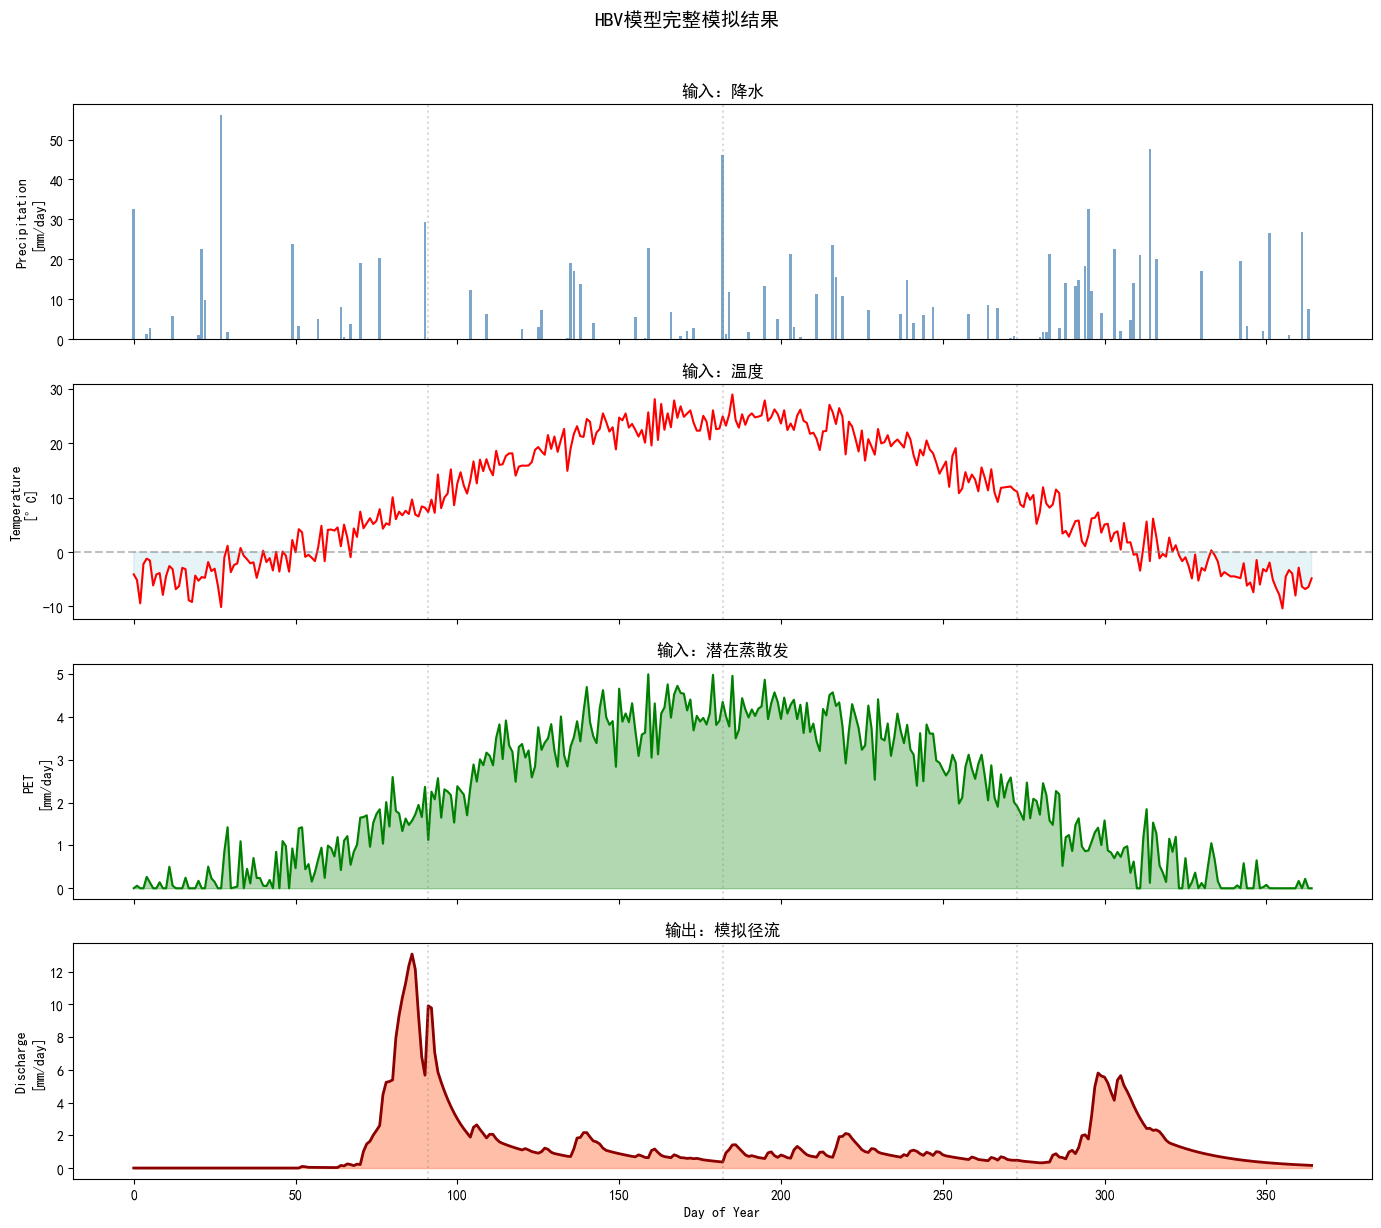

In [9]:
# 可视化完整模拟结果
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

days = np.arange(len(precip))

# 1. 降水
axes[0].bar(days, precip, color='steelblue', alpha=0.7)
axes[0].set_ylabel('Precipitation\n[mm/day]')
axes[0].set_title('输入：降水', fontweight='bold')

# 2. 温度
axes[1].plot(days, temp, 'r-', linewidth=1.5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1].fill_between(days, temp, 0, where=(temp < 0), color='lightblue', alpha=0.3)
axes[1].set_ylabel('Temperature\n[°C]')
axes[1].set_title('输入：温度', fontweight='bold')

# 3. PET
axes[2].fill_between(days, 0, pet, color='green', alpha=0.3)
axes[2].plot(days, pet, 'g-', linewidth=1.5)
axes[2].set_ylabel('PET\n[mm/day]')
axes[2].set_title('输入：潜在蒸散发', fontweight='bold')

# 4. 模拟径流
axes[3].fill_between(days, 0, discharge, color='coral', alpha=0.5)
axes[3].plot(days, discharge, 'darkred', linewidth=2)
axes[3].set_ylabel('Discharge\n[mm/day]')
axes[3].set_xlabel('Day of Year')
axes[3].set_title('输出：模拟径流', fontweight='bold')

# 添加季节标注
for ax in axes:
    ax.axvline(x=91, color='gray', linestyle=':', alpha=0.3)  # 春季
    ax.axvline(x=182, color='gray', linestyle=':', alpha=0.3)  # 夏季
    ax.axvline(x=273, color='gray', linestyle=':', alpha=0.3)  # 秋季

plt.suptitle('HBV模型完整模拟结果', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 📚 总结

### HBV模型的四个模块

| 模块 | 功能 | 核心参数 | 物理意义 |
|------|------|----------|----------|
| 雪模块 | 降雪累积/融化 | TT, CFMAX | 决定冬季水分储存 |
| 土壤模块 | 产流/蒸发 | FC, BETA, LP | 决定有多少水形成径流 |
| 响应模块 | 地下水出流 | K0, K1, K2 | 决定径流的快慢 |
| 汇流模块 | 河道演进 | MAXBAS | 决定洪峰的延迟 |

### 关键认识

1. **物理模型的优势**：每个参数都有明确的物理意义
2. **参数交互**：参数之间存在复杂的相互作用
3. **不确定性**：相同的输出可能来自不同的参数组合（等效性问题）

### 下一步学习

在下一个模块中，我们将学习数据驱动模型（LSTM），
看看机器学习如何从数据中"学习"这些复杂的水文过程！